In [1]:
from __future__ import print_function

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
    
import geopandas as gpd
import os
import sys
import matplotlib.pylab as plt
import requests
import json
import numpy as np
import pandas as pd
import io
import shapely
import numpy as np

%matplotlib inline

In [2]:
!curl https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip > pluto.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46.0M  100 46.0M    0     0  8229k      0  0:00:05  0:00:05 --:--:-- 8707k


In [3]:
# move the data
!mv pluto.zip $PUIDATA

In [4]:
!unzip pluto.zip

Archive:  pluto.zip
replace PLUTO_for_WEB/BK_18v1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
import pandas as pd
dhs = pd.read_csv("%s/PLUTO_for_WEB/MN_18v1.csv"%os.getenv("PUIDATA"))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dhs.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


In [11]:
list(dhs)

['Borough',
 'Block',
 'Lot',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'ZipCode',
 'FireComp',
 'PolicePrct',
 'HealthCenterDistrict',
 'HealthArea',
 'SanitBoro',
 'SanitDistrict',
 'SanitSub',
 'Address',
 'ZoneDist1',
 'ZoneDist2',
 'ZoneDist3',
 'ZoneDist4',
 'Overlay1',
 'Overlay2',
 'SPDist1',
 'SPDist2',
 'SPDist3',
 'LtdHeight',
 'SplitZone',
 'BldgClass',
 'LandUse',
 'Easements',
 'OwnerType',
 'OwnerName',
 'LotArea',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'OtherArea',
 'AreaSource',
 'NumBldgs',
 'NumFloors',
 'UnitsRes',
 'UnitsTotal',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'Ext',
 'ProxCode',
 'IrrLotCode',
 'LotType',
 'BsmtCode',
 'AssessLand',
 'AssessTot',
 'ExemptLand',
 'ExemptTot',
 'YearBuilt',
 'YearAlter1',
 'YearAlter2',
 'HistDist',
 'Landmark',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YC

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
os.getenv("PUIDATA")

In [8]:
url = "https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile"
urllib.urlretrieve(url, "shp.gz")

('shp.gz', <httplib.HTTPMessage instance at 0x10e679d88>)

In [9]:
!unzip shp.gz

Archive:  shp.gz
  inflating: geo_export_e2979273-e970-427b-9ee4-c09b45e6423d.dbf  
  inflating: geo_export_e2979273-e970-427b-9ee4-c09b45e6423d.shp  
  inflating: geo_export_e2979273-e970-427b-9ee4-c09b45e6423d.shx  
  inflating: geo_export_e2979273-e970-427b-9ee4-c09b45e6423d.prj  


In [26]:
pumashp = gpd.read_file('taxi_zones/taxi_zones.shp')
pumashp.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [24]:
pumashp.puma = pumashp.puma.astype(int)

AttributeError: 'GeoDataFrame' object has no attribute 'puma'

In [27]:
pumashp.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


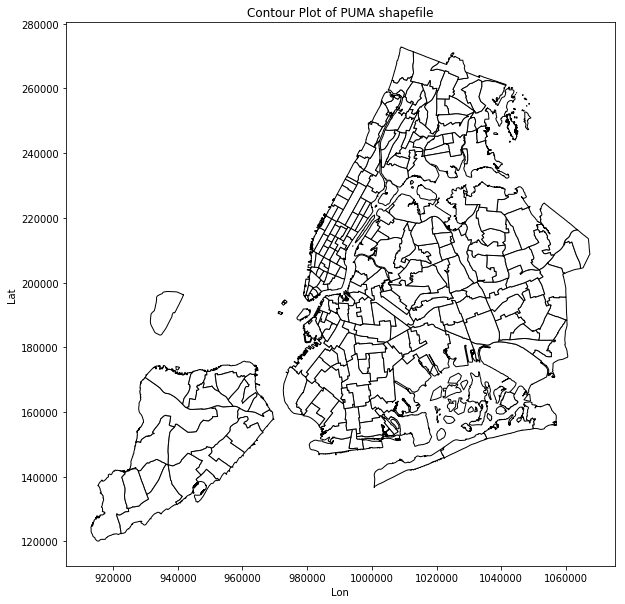

In [28]:
f,ax = plt.subplots(figsize=(10, 10))
ax = pumashp.plot(ax=ax,color="white",edgecolor="black",linewidth=1)
ax.set_title('Contour Plot of PUMA shapefile')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
plt.show()

In [15]:
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv"
urllib.urlretrieve(url, "tlc1.csv")

('tlc1.csv', <httplib.HTTPMessage instance at 0x10f07e3f8>)

In [16]:
tlc = pd.read_csv('tlc1.csv')

In [17]:
tlc.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [18]:
!curl http://www.nyc.gov/html/exit-page.html?url=https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip > zonal.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9170  100  9170    0     0  54910      0 --:--:-- --:--:-- --:--:-- 54910


In [2]:
# move the data
!mv zonal.zip $PUIDATA

In [20]:
!unzip zonal.zip

Archive:  zonal.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of zonal.zip or
        zonal.zip.zip, and cannot find zonal.zip.ZIP, period.


In [29]:
taxizone = pumashp

In [10]:
taxizone = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "taxi_zones.shp")

In [49]:
taxizone['coords'] = taxizone['geometry'].apply(lambda x: x.representative_point().coords[:])
taxizone['coords'] = [coords[0] for coords in taxizone['coords']]
taxizone.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)"
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...","(1032515.6723, 167292.493195)"
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...","(1025882.73475, 254779.600631)"
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051, 203105.532318)"
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...","(931467.962751, 139837.478389)"


In [50]:
taxizone.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)"
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...","(1032515.6723, 167292.493195)"
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...","(1025882.73475, 254779.600631)"
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051, 203105.532318)"
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...","(931467.962751, 139837.478389)"


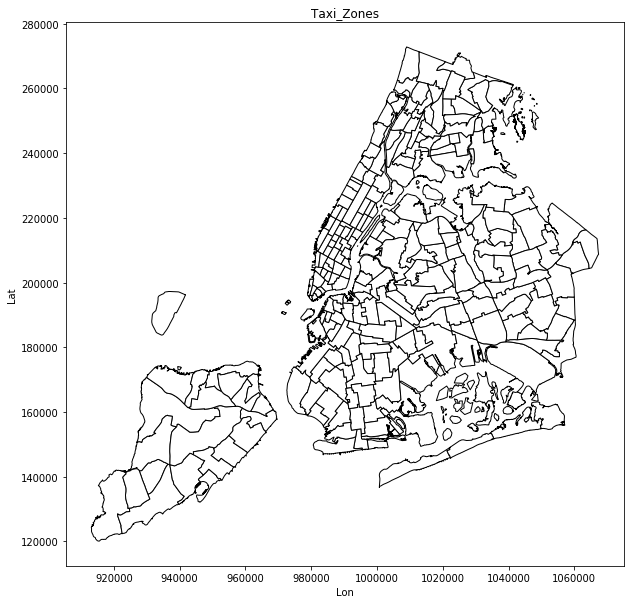

In [16]:
f,ax = plt.subplots(figsize=(10, 10))
ax = taxizone.plot(ax=ax,color="white",edgecolor="black",linewidth=1)
#linkNYC.plot(ax=ax,markersize=4,c=linkNYC['age'],cmap="OrRd")
ax.set_title('Taxi_Zones')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
plt.show()

In [51]:
taxizone1 = taxizone.merge(tlc, how = 'inner', left_on = 'LocationID', right_on = 'PULocationID' )

In [56]:
taxizone1.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords,VendorID,tpep_pickup_datetime,...,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)",1,2018-06-01 01:26:30,...,1,1,2,170.0,0.0,0.0,0.00,0.0,0.3,170.30
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)",1,2018-06-01 04:10:34,...,1,1,1,89.0,0.0,0.0,17.85,0.0,0.3,107.15
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)",1,2018-06-01 08:28:41,...,1,1,1,3.0,0.0,0.5,110.00,0.0,0.3,113.80
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)",1,2018-06-01 08:30:31,...,1,1,1,110.0,0.0,0.0,22.05,0.0,0.3,132.35
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)",1,2018-06-01 09:18:43,...,1,1,1,85.0,0.0,0.0,24.45,12.5,0.3,122.25


In [17]:
list(taxizone1)

['OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

In [ ]:
print('x')

In [60]:
x = taxizone2.groupby(by='PULocationID').sum()


In [61]:
x['PULocationID'] = x.index
x.reset_index(drop=True, inplace=True)
x.head()

,total_amount,PULocationID
0,64303.16,1
1,442.94,2
2,2636.33,3
3,276635.83,4
4,292.82,5


In [62]:
x = x.merge(taxizone, left_on='PULocationID', right_on='LocationID', how='inner')
x.head()

,total_amount,PULocationID,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,coords
0,64303.16,1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...","(935223.026586, 190535.052575)"
1,442.94,2,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...","(1032515.6723, 167292.493195)"
2,2636.33,3,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...","(1025882.73475, 254779.600631)"
3,276635.83,4,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...","(990618.795051, 203105.532318)"
4,292.82,5,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...","(931467.962751, 139837.478389)"


In [63]:
x.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

KeyboardInterrupt: 

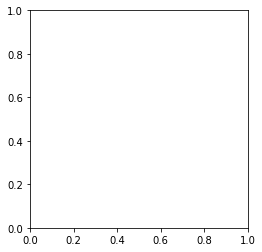

In [33]:
taxizone1.plot(column='total_amount')

In [ ]:
ax = taxizone.plot()

In [34]:
type(taxizone1)

geopandas.geodataframe.GeoDataFrame

In [39]:
taxizone1.crs

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

In [41]:
type(taxizone1)

geopandas.geodataframe.GeoDataFrame

In [53]:
taxizone2 = taxizone1[['PULocationID', 'geometry', 'total_amount', 'coords']]
taxizone2.head()

,PULocationID,geometry,total_amount,coords
0,1,"POLYGON ((933100.9183527103 192536.0856972019,...",170.30,"(935223.026586, 190535.052575)"
1,1,"POLYGON ((933100.9183527103 192536.0856972019,...",107.15,"(935223.026586, 190535.052575)"
2,1,"POLYGON ((933100.9183527103 192536.0856972019,...",113.80,"(935223.026586, 190535.052575)"
3,1,"POLYGON ((933100.9183527103 192536.0856972019,...",132.35,"(935223.026586, 190535.052575)"
4,1,"POLYGON ((933100.9183527103 192536.0856972019,...",122.25,"(935223.026586, 190535.052575)"


In [54]:
taxizone2.plot(column='')

{u'datum': u'NAD83',
 u'lat_0': 40.16666666666666,
 u'lat_1': 40.66666666666666,
 u'lat_2': 41.03333333333333,
 u'lon_0': -74,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'us-ft',
 u'x_0': 300000,
 u'y_0': 0}

In [55]:
taxizone2.to_crs(epsg=4326)

KeyboardInterrupt: 

In [45]:
taxizone2 = pd.DataFrame(taxizone2)
type(taxizone2)

pandas.core.frame.DataFrame

In [64]:
crs = {'init': 'epsg:4326'}
x = gpd.GeoDataFrame(x, crs=crs, geometry='geometry')

In [47]:
taxizone2.head()

,PULocationID,geometry,total_amount
0,1,"POLYGON ((933100.9183527103 192536.0856972019,...",170.30
1,1,"POLYGON ((933100.9183527103 192536.0856972019,...",107.15
2,1,"POLYGON ((933100.9183527103 192536.0856972019,...",113.80
3,1,"POLYGON ((933100.9183527103 192536.0856972019,...",132.35
4,1,"POLYGON ((933100.9183527103 192536.0856972019,...",122.25


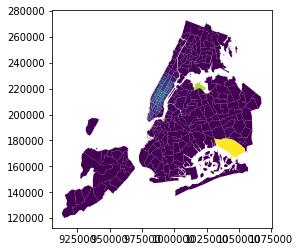

In [65]:
x.plot(column='total_amount')